In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import csv
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate


In [ ]:
# At this part i read in the files.
X = pd.read_csv('pc_X_train.csv')
#Final_X_test = pd.read_csv('pc_X_test.csv')
Y = pd.read_csv('pc_y_train.csv')
X = X.drop(X.columns[0], axis=1)
#Final_x_test = Final_X_test.drop(Final_X_test.columns[0], axis=1)

# Split oour data for training and testing our model
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['score'], test_size=0.2, random_state=random_seed)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# The following code block is taken from: https://github.com/bnsreenu/python_for_microscopists/blob/master/141-regression_housing_example.py
# than rewritten and modelled separatly by me.
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import Adam

optimizer_Adam = Adam(learning_rate=0.001)

model = Sequential()
model.add(Dense(256, input_dim=468, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))



model.compile(loss='mean_absolute_error', optimizer=optimizer_Adam, metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs =200)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               120064    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 161,281
Trainable params: 161,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 3s 35ms/step - loss: 1.2503 - mae: 1.2503 - val_loss: 0.8773 - val_mae: 0.8773
Epoch 2/200
40/40 [==============================]

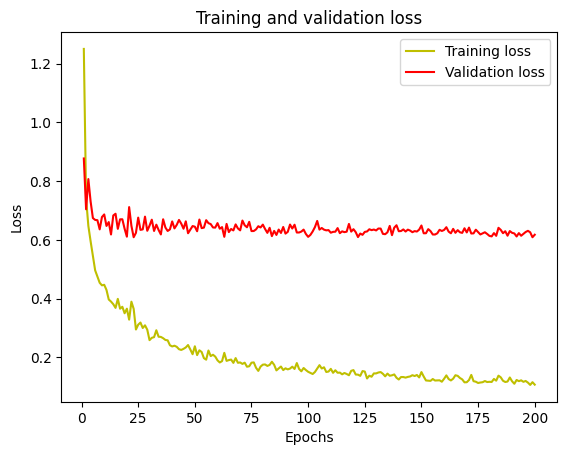

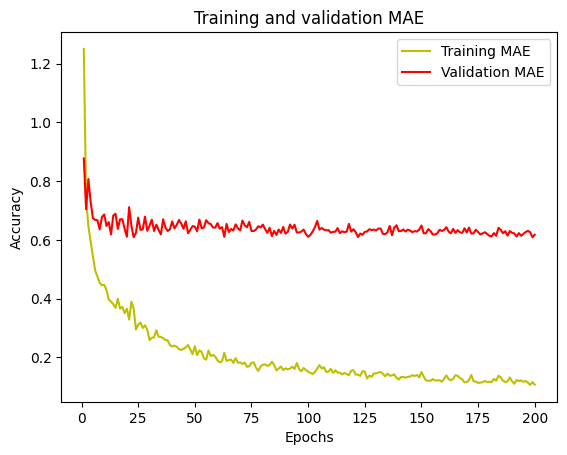

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# This function is for writing out our final predicted y to a file for later upload
def WriteOutput(data,file_path="output.csv"):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)

        writer.writerow(['id', 'score'])

        for idx, score in enumerate(data):
          if isinstance(score, np.ndarray):
                cleaned_score = str(score).strip('[]')
          else:
                cleaned_score = str(score)

          writer.writerow([idx, cleaned_score])

Final_X_test = pd.read_csv('pc_X_test.csv')
Final_X_test = Final_X_test.drop(Final_X_test.columns[0], axis=1)

Final_X_test = scaler.transform(Final_X_test)
Final_y_pred = model.predict(Final_X_test)
WriteOutput(Final_y_pred,"nn02_res.csv")

16/16 [==============================] - 0s 2ms/step


Same thing for dropped columns wiht vairance:

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

pca = PCA(n_components='mle',svd_solver='full')
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [ ]:
X_train_PCA.shape[1]

349

In [ ]:
# The following code block is taken from: https://github.com/bnsreenu/python_for_microscopists/blob/master/141-regression_housing_example.py
# than rewritten and modelled separatly by me.
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = Sequential()
model.add(Dense(256, input_dim=X_train_PCA.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
model.summary()

history2 = model.fit(X_train_PCA, Y_train, validation_split=0.2, epochs =200)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               89600     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 130,817
Trainable params: 130,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 1s 13ms/step - loss: 1.3165 - mae: 1.3165 - val_loss: 0.8825 - val_mae: 0.8825
Epoch 2/200
40/40 [=============================

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.001)
X_train_PCA_var = sel.fit_transform(X_train_PCA)
X_test_PCA_var = sel.transform(X_train_PCA)

In [ ]:
X_train_PCA_var.shape

(1580, 229)

In [ ]:
# The following code block is taken from: https://github.com/bnsreenu/python_for_microscopists/blob/master/141-regression_housing_example.py
# than rewritten and modelled separatly by me.
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model3 = Sequential()
model3.add(Dense(256, input_dim=X_train_PCA_var.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
model3.summary()

history3 = model3.fit(X_train_PCA_var, Y_train, validation_split=0.2, epochs =250)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               58880     
                                                                 
Total params: 58,880
Trainable params: 58,880
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
40/40 [==============================] - 1s 8ms/step - loss: 3.1959 - mae: 3.1959 - val_loss: 3.0726 - val_mae: 3.0726
Epoch 2/250
40/40 [==============================] - 0s 4ms/step - loss: 3.0474 - mae: 3.0474 - val_loss: 2.9536 - val_mae: 2.9536
Epoch 3/250
40/40 [==============================] - 0s 4ms/step - loss: 2.9227 - mae: 2.9227 - val_loss: 2.8579 - val_mae: 2.8579
Epoch 4/250
40/40 [==============================] - 0s 4ms/step - loss: 2.8198 - mae: 2.8198 - val_loss: 2.7843 - val_mae: 2.7843
Epoch 5/250
40/40 [==============================] - 0

In [ ]:
epochs2 = np.arange(0,250)


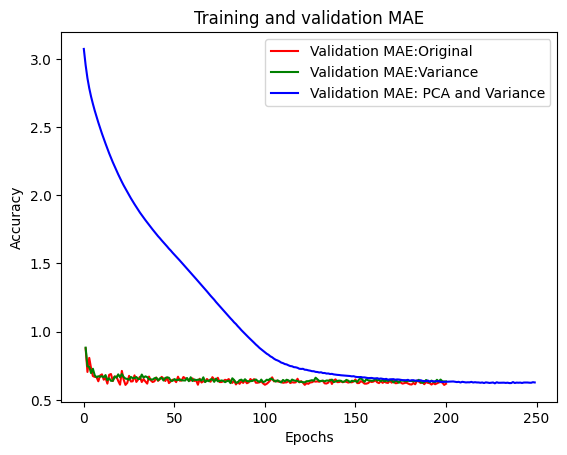

In [ ]:
Cutoff =10
acc = history.history['mae']
val_acc = history.history['val_mae']

acc2 = history2.history['mae']
val_acc2 = history2.history['val_mae']

acc3 = history3.history['mae']
val_acc3 = history3.history['val_mae']

#plt.plot(epochs, acc[CutOff:], 'y', label='Training MAE')
plt.plot(epochs[:], val_acc[:], 'r', label='Validation MAE:Original')

#plt.plot(epochs, acc2[CutOff:], 'g', label='Training MAE')
plt.plot(epochs[:], val_acc2[:], 'g', label='Validation MAE:Variance')

#plt.plot(epochs, acc3[CutOff:], 'y', label='Training MAE')
plt.plot(epochs2[:], val_acc3[:], 'b', label='Validation MAE: PCA and Variance')

plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




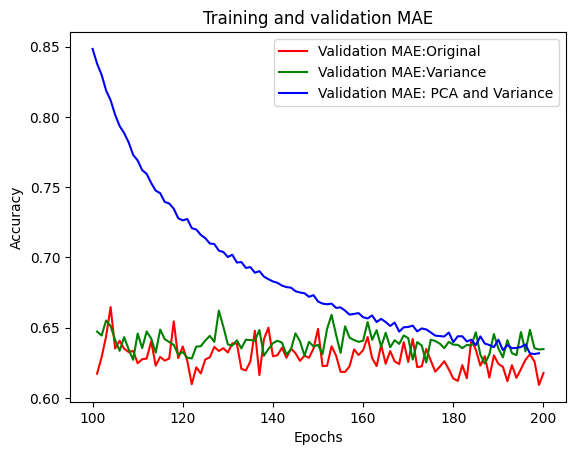

In [ ]:
# Second graph with cutoff:
acc = history.history['mae']
val_acc = history.history['val_mae']

acc2 = history2.history['mae']
val_acc2 = history2.history['val_mae']

acc3 = history3.history['mae']
val_acc3 = history3.history['val_mae']

#plt.plot(epochs, acc[CutOff:], 'y', label='Training MAE')
plt.plot(epochs[100:], val_acc[100:], 'r', label='Validation MAE:Original')

#plt.plot(epochs, acc2[CutOff:], 'g', label='Training MAE')
plt.plot(epochs[100:], val_acc2[100:], 'g', label='Validation MAE:Variance')

#plt.plot(epochs, acc3[CutOff:], 'y', label='Training MAE')
plt.plot(epochs2[100:200], val_acc3[100:200], 'b', label='Validation MAE: PCA and Variance')

plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# PCA with own conditions:

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

comp= int(np.ceil(0.8*X_train.shape[1]))
pca2 = PCA(n_components=comp)
X_train_PCA2 = pca2.fit_transform(X_train)
X_test_PCA2 = pca2.transform(X_test)


In [ ]:
# The following code block is taken from: https://github.com/bnsreenu/python_for_microscopists/blob/master/141-regression_housing_example.py
# than rewritten and modelled separatly by me.
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(256, input_dim=X_train_PCA2.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



history4 = model.fit(X_train_PCA2, Y_train, validation_split=0.2,epochs=250, callbacks=[early_stopping])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               96256     
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 140,033
Trainable params: 140,033
Non-tr